In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('Reporte_Calidad_de_Aire_AMB_20250629.csv')

print("Archivo cargado exitosamente.")
print(f"Shape del DataFrame: {df.shape}")

# DEFINIR TODAS LAS FUNCIONES
def clean_column_names(df):
    """
    Limpia los nombres de las columnas eliminando espacios extra
    """
    df.columns = df.columns.str.strip()
    return df

def preprocess_environmental_data(df):
    """
    Preprocesa los datos ambientales transformando de formato ancho a largo

    Args:
        df: DataFrame con los datos originales

    Returns:
        DataFrame preprocesado con formato largo
    """

    # Identificar las estaciones únicas
    stations = [
        'EST. LAGOS I F/BLANCA',
        'EST. LACIUDADELA',
        'EST. SANTA CRUZ GIRÓN',
        'EST. SAN FRANCISCO',
        'EST. LAGOS DEL CACIQUE'
    ]

    # Variables a extraer para cada estación
    variables = [
        'PM10', 'PM2,5', 'NO2', 'O3', 'TEMPERATURA', 'LLUVIA',
        'HUMEDAD', 'DIR. VIENTO', 'VEL.VIENTO', 'RAD. SOLAR'
    ]

    # Lista para almacenar los datos transformados
    processed_data = []

    # Procesar cada fila del DataFrame original
    for idx, row in df.iterrows():
        timestamp = row['TIEMPO']

        # Procesar cada estación
        for station in stations:
            station_data = {'TIEMPO': timestamp, 'ESTACION': station}

            # Extraer variables para esta estación
            for var in variables:
                col_name = f"{station} {var}"
                if col_name in df.columns:
                    value = row[col_name]
                    # Convertir 'NA' a NaN
                    if value == 'NA' or pd.isna(value):
                        station_data[var] = np.nan
                    else:
                        try:
                            station_data[var] = float(value)
                        except (ValueError, TypeError):
                            station_data[var] = np.nan
                else:
                    station_data[var] = np.nan

            processed_data.append(station_data)

    # Crear DataFrame final
    result_df = pd.DataFrame(processed_data)

    # Reordenar columnas
    column_order = ['TIEMPO', 'ESTACION'] + variables
    result_df = result_df[column_order]

    return result_df

def process_colab_data(df):
    """
    Función específica para procesar tu DataFrame ya cargado en Colab
    """
    print("Iniciando preprocesamiento...")
    print(f"Shape original: {df.shape}")
    print(f"Columnas encontradas: {len(df.columns)}")

    # Limpiar nombres de columnas
    df = clean_column_names(df)

    # Mostrar algunas columnas para verificar
    print("\nPrimeras 5 columnas:")
    print(list(df.columns[:5]))

    # Procesar datos
    processed_df = preprocess_environmental_data(df)

    # Convertir columna de tiempo a datetime
    try:
        processed_df['TIEMPO'] = pd.to_datetime(processed_df['TIEMPO'], format='mixed', dayfirst=True, errors='raise')
        print("✓ Conversión de tiempo exitosa")
    except Exception as e:
        print(f"⚠ Error en conversión de tiempo: {e}")
        # Intentar otros formatos comunes
        try:
            processed_df['TIEMPO'] = pd.to_datetime(processed_df['TIEMPO'])
            print("✓ Conversión de tiempo exitosa (formato automático)")
        except:
            print("✗ No se pudo convertir la columna de tiempo")

    print(f"Shape procesado: {processed_df.shape}")
    return processed_df

def show_data_summary(df):
    """
    Muestra un resumen de los datos procesados
    """
    print("=== RESUMEN DE DATOS PROCESADOS ===")
    print(f"Número total de registros: {len(df)}")
    print(f"Número de estaciones: {df['ESTACION'].nunique()}")
    print(f"Rango temporal: {df['TIEMPO'].min()} a {df['TIEMPO'].max()}")
    print("\nEstaciones disponibles:")
    for station in df['ESTACION'].unique():
        count = len(df[df['ESTACION'] == station])
        print(f"  - {station}: {count} registros")

    print("\nVariables disponibles:")
    variables = [col for col in df.columns if col not in ['TIEMPO', 'ESTACION']]
    for var in variables:
        non_na_count = df[var].notna().sum()
        print(f"  - {var}: {non_na_count} valores no nulos")

# EJECUTAR EL PROCESAMIENTO COMPLETO
print("\n🚀 INICIANDO PROCESAMIENTO AUTOMÁTICO...")
print("=" * 50)

# Procesar los datos
df_processed = process_colab_data(df)

# Mostrar primeras filas
print("\n=== PRIMERAS 10 FILAS PROCESADAS ===")
print(df_processed.head(10))

# Mostrar resumen
show_data_summary(df_processed)

# Mostrar ejemplo de una estación específica
print("\n=== EJEMPLO: DATOS DE EST. LACIUDADELA ===")
if 'EST. LACIUDADELA' in df_processed['ESTACION'].values:
    lagos_data = df_processed[df_processed['ESTACION'] == 'EST. LACIUDADELA'].head()
    print(lagos_data[['TIEMPO', 'ESTACION', 'PM10', 'PM2,5', 'TEMPERATURA', 'HUMEDAD']])

print("\n✅ ¡PROCESO COMPLETADO EXITOSAMENTE!")
print("El archivo procesado ha sido descargado a tu computadora.")

C:\Users\ingya\AppData\Local\Temp\ipykernel_7220\757864982.py:5: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Reporte_Calidad_de_Aire_AMB_20250629.csv')


Archivo cargado exitosamente.
Shape del DataFrame: (16824, 45)

🚀 INICIANDO PROCESAMIENTO AUTOMÁTICO...
Iniciando preprocesamiento...
Shape original: (16824, 45)
Columnas encontradas: 45

Primeras 5 columnas:
['TIEMPO', 'EST. LAGOS I F/BLANCA PM10', 'EST. LAGOS I F/BLANCA PM2,5', 'EST. LAGOS I F/BLANCA NO2', 'EST. LAGOS I F/BLANCA O3']
✓ Conversión de tiempo exitosa
Shape procesado: (84120, 12)

=== PRIMERAS 10 FILAS PROCESADAS ===
               TIEMPO                ESTACION  PM10  PM2,5      NO2    O3  \
0 2018-10-01 00:00:00   EST. LAGOS I F/BLANCA   NaN    NaN      NaN   NaN   
1 2018-10-01 00:00:00        EST. LACIUDADELA  23.8   12.1  23.8128   3.4   
2 2018-10-01 00:00:00   EST. SANTA CRUZ GIRÓN  13.5    5.6      NaN   NaN   
3 2018-10-01 00:00:00      EST. SAN FRANCISCO  13.0    6.4      NaN   NaN   
4 2018-10-01 00:00:00  EST. LAGOS DEL CACIQUE  10.2    4.9      NaN   NaN   
5 2018-10-01 01:00:00   EST. LAGOS I F/BLANCA   NaN    NaN      NaN   NaN   
6 2018-10-01 01:00:00    

In [2]:
# Convertir nulos de features con imputer knn
features = ['TEMPERATURA', 'LLUVIA', 'HUMEDAD',
            'DIR. VIENTO', 'VEL.VIENTO', 'RAD. SOLAR']

X = df_processed[features].copy()

from sklearn.impute import KNNImputer
import pandas as pd

imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)

df_processed[features] = X_imputed


In [3]:
#Convertir nulos en media
# Identificar columnas a excluir (categóricas)
#excluded_cols = ['TIEMPO', 'ESTACION']

# Seleccionar solo columnas numéricas para el relleno
#cols_to_fill = df_processed.columns.difference(excluded_cols)

# Rellenar NaN con la media solo en columnas seleccionadas
#df_processed[cols_to_fill] = df_processed[cols_to_fill].fillna(
#    df_processed[cols_to_fill].mean()
#)

# Mostrar resultados
#df_processed.head()


In [4]:
#Ver nulos
df_processed.isnull().sum()

TIEMPO             0
ESTACION           0
PM10           16961
PM2,5          10621
NO2            62586
O3             61151
TEMPERATURA        0
LLUVIA             0
HUMEDAD            0
DIR. VIENTO        0
VEL.VIENTO         0
RAD. SOLAR         0
dtype: int64

In [5]:
#Ver tipo de datos y cantiad
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84120 entries, 0 to 84119
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TIEMPO       84120 non-null  datetime64[ns]
 1   ESTACION     84120 non-null  object        
 2   PM10         67159 non-null  float64       
 3   PM2,5        73499 non-null  float64       
 4   NO2          21534 non-null  float64       
 5   O3           22969 non-null  float64       
 6   TEMPERATURA  84120 non-null  float64       
 7   LLUVIA       84120 non-null  float64       
 8   HUMEDAD      84120 non-null  float64       
 9   DIR. VIENTO  84120 non-null  float64       
 10  VEL.VIENTO   84120 non-null  float64       
 11  RAD. SOLAR   84120 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 7.7+ MB


In [6]:
df_processed.head()

,TIEMPO,ESTACION,PM10,"PM2,5",NO2,O3,TEMPERATURA,LLUVIA,HUMEDAD,DIR. VIENTO,VEL.VIENTO,RAD. SOLAR
0,2018-10-01,EST. LAGOS I F/BLANCA,NaN,NaN,NaN,NaN,0.000000,0.160000,64.060000,292.180000,1.500000,156.200000
1,2018-10-01,EST. LACIUDADELA,23.8,12.1,23.8128,3.4,25.051021,0.065205,67.897428,245.413796,1.388598,191.958817
2,2018-10-01,EST. SANTA CRUZ GIRÓN,13.5,5.6,NaN,NaN,23.600000,0.000000,86.400000,339.400000,1.620000,0.000000
3,2018-10-01,EST. SAN FRANCISCO,13.0,6.4,NaN,NaN,22.900000,0.000000,80.200000,126.200000,1.000000,0.000000
4,2018-10-01,EST. LAGOS DEL CACIQUE,10.2,4.9,NaN,NaN,22.200000,0.100000,83.500000,290.600000,2.700000,0.000000


In [7]:

def crear_copia_para_nn(df_processed):
    """
    Crea una copia independiente del DataFrame para redes neuronales
    """
    df_nn = df_processed.copy()
    print(f"Creada copia para NN con {len(df_nn)} registros")
    return df_nn


print("Creando copia del DataFrame para preservar datos originales...")
df_nn = crear_copia_para_nn(df_processed)

Creando copia del DataFrame para preservar datos originales...
Creada copia para NN con 84120 registros


## Entrenamiento Decision Tree

In [9]:
!pip install xgboost

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


# Preparar datos
contaminantes = ['PM10', 'PM2,5', 'NO2', 'O3']

# Codificar estaciones (única variable categórica)
le = LabelEncoder()
df_processed['ESTACION_ENC'] = le.fit_transform(df_processed['ESTACION'])

# Crear características temporales
df_processed['HORA'] = df_processed['TIEMPO'].dt.hour
df_processed['DIA'] = df_processed['TIEMPO'].dt.day
df_processed['MES'] = df_processed['TIEMPO'].dt.month
df_processed['DIA_SEMANA'] = df_processed['TIEMPO'].dt.dayofweek
df_processed['DIA_AÑO'] = df_processed['TIEMPO'].dt.dayofyear

# Features finales (incluyendo tiempo y estación codificada)
features = ['ESTACION_ENC', 'HORA', 'DIA', 'MES', 'DIA_SEMANA', 'DIA_AÑO',
           'TEMPERATURA', 'LLUVIA', 'HUMEDAD', 'DIR. VIENTO', 'VEL.VIENTO', 'RAD. SOLAR']


resultados = []

# Entrenamiento por contaminante
for contaminante in contaminantes:
    print(f"\n=== ENTRENANDO PARA {contaminante} ===")

    # Filtrar datos válidos
    df_clean = df_processed.dropna(subset=[contaminante] + features)

    if len(df_clean) < 100:
        print(f"Pocos datos para {contaminante}: {len(df_clean)} registros")
        continue

    # Preparar X e y
    X = df_clean[features]
    y = df_clean[contaminante]

    # División train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Datos de entrenamiento: {len(X_train)}, Datos de prueba: {len(X_test)}")

    # === RANDOM FOREST ===
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Métricas RF
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)

    resultados.append({
        'Contaminante': contaminante,
        'Modelo': 'Random Forest',
        'MSE': rf_mse,
        'MAE': rf_mae,
        'R²': rf_r2,
        'Datos': len(df_clean)
    })

    # === XGBOOST ===
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)

    # Métricas XGBoost
    xgb_mse = mean_squared_error(y_test, xgb_pred)
    xgb_mae = mean_absolute_error(y_test, xgb_pred)
    xgb_r2 = r2_score(y_test, xgb_pred)

    resultados.append({
        'Contaminante': contaminante,
        'Modelo': 'XGBoost',
        'MSE': xgb_mse,
        'MAE': xgb_mae,
        'R²': xgb_r2,
        'Datos': len(df_clean)
    })

    print(f"Random Forest - MSE: {rf_mse:.3f}, MAE: {rf_mae:.3f}, R²: {rf_r2:.3f}")
    print(f"XGBoost - MSE: {xgb_mse:.3f}, MAE: {xgb_mae:.3f}, R²: {xgb_r2:.3f}")

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla formateada
print("\n" + "="*80)
print("TABLA DE MÉTRICAS FINALES")
print("="*80)
print(df_resultados.to_string(index=False, float_format='%.3f'))



=== ENTRENANDO PARA PM10 ===
Datos de entrenamiento: 53727, Datos de prueba: 13432
Random Forest - MSE: 81.047, MAE: 5.919, R²: 0.823
XGBoost - MSE: 92.427, MAE: 6.535, R²: 0.798

=== ENTRENANDO PARA PM2,5 ===
Datos de entrenamiento: 58799, Datos de prueba: 14700
Random Forest - MSE: 17.280, MAE: 2.593, R²: 0.915
XGBoost - MSE: 23.900, MAE: 3.260, R²: 0.882

=== ENTRENANDO PARA NO2 ===
Datos de entrenamiento: 17227, Datos de prueba: 4307
Random Forest - MSE: 44.817, MAE: 4.539, R²: 0.651
XGBoost - MSE: 44.941, MAE: 4.651, R²: 0.650

=== ENTRENANDO PARA O3 ===
Datos de entrenamiento: 18375, Datos de prueba: 4594
Random Forest - MSE: 97.379, MAE: 6.478, R²: 0.857
XGBoost - MSE: 87.145, MAE: 6.394, R²: 0.872

TABLA DE MÉTRICAS FINALES
Contaminante        Modelo    MSE   MAE    R²  Datos
        PM10 Random Forest 81.047 5.919 0.823  67159
        PM10       XGBoost 92.427 6.535 0.798  67159
       PM2,5 Random Forest 17.280 2.593 0.915  73499
       PM2,5       XGBoost 23.900 3.260 0.882

In [11]:
# Analizar importancia de características
print("\n=== IMPORTANCIA DE CARACTERÍSTICAS ===")

for contaminante in contaminantes:
    df_clean = df_processed.dropna(subset=[contaminante] + features)

    if len(df_clean) < 100:
        continue

    X = df_clean[features]
    y = df_clean[contaminante]

    # Random Forest para importancia
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Crear DataFrame de importancia
    importancia = pd.DataFrame({
        'Feature': features,
        'Importancia': rf.feature_importances_
    }).sort_values('Importancia', ascending=False)

    print(f"\n{contaminante} - Top 5 características más importantes:")
    print(importancia.head().to_string(index=False, float_format='%.4f'))



=== IMPORTANCIA DE CARACTERÍSTICAS ===

PM10 - Top 5 características más importantes:
     Feature  Importancia
     DIA_AÑO       0.5011
ESTACION_ENC       0.0882
         DIA       0.0601
     HUMEDAD       0.0549
 TEMPERATURA       0.0541

PM2,5 - Top 5 características más importantes:
   Feature  Importancia
   DIA_AÑO       0.6303
       DIA       0.0670
       MES       0.0622
DIA_SEMANA       0.0425
   HUMEDAD       0.0384

NO2 - Top 5 características más importantes:
    Feature  Importancia
       HORA       0.2489
    DIA_AÑO       0.1861
    HUMEDAD       0.0925
DIR. VIENTO       0.0767
TEMPERATURA       0.0766

O3 - Top 5 características más importantes:
     Feature  Importancia
 TEMPERATURA       0.5424
     DIA_AÑO       0.1167
 DIR. VIENTO       0.0726
  VEL.VIENTO       0.0559
ESTACION_ENC       0.0504


## Entrenamiento con Redes Neuronales mediante Pytorch

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt

def graficar_losses(train_losses, val_losses, contaminante):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(val_losses, label='Validation Loss', marker='x')
    plt.title(f'Pérdida por época - {contaminante}')
    plt.xlabel('Época')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'loss_plot_{contaminante.replace(",", "").replace(".", "")}.png')
    plt.show()


In [15]:
# =============================================
# 1. DEFINIR ARQUITECTURA DE RED NEURONAL
# =============================================
class ContaminanteNN(nn.Module):
    def __init__(self, input_size, hidden_sizes=[128, 64, 32], dropout_rate=0.3):
        super(ContaminanteNN, self).__init__()

        layers = []
        prev_size = input_size

        # Capas ocultas
        for hidden_size in hidden_sizes:
            layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_size),
                nn.Dropout(dropout_rate)
            ])
            prev_size = hidden_size

        # Capa de salida
        layers.append(nn.Linear(prev_size, 1))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# =============================================
# 2. FUNCIÓN DE ENTRENAMIENTO
# =============================================
def entrenar_modelo_nn(model, train_loader_nn, val_loader_nn, num_epochs=100, learning_rate=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)

    best_val_loss = float('inf')
    patience_counter = 0
    early_stopping_patience = 20

    train_losses_nn = []
    val_losses_nn = []

    for epoch in range(num_epochs):
        # Entrenamiento
        model.train()
        train_loss_nn = 0.0
        for batch_x_nn, batch_y_nn in train_loader_nn:
            batch_x_nn, batch_y_nn = batch_x_nn.to(device), batch_y_nn.to(device)

            optimizer.zero_grad()
            outputs_nn = model(batch_x_nn)
            loss_nn = criterion(outputs_nn, batch_y_nn)
            loss_nn.backward()
            optimizer.step()

            train_loss_nn += loss_nn.item()

        # Validación
        model.eval()
        val_loss_nn = 0.0
        with torch.no_grad():
            for batch_x_nn, batch_y_nn in val_loader_nn:
                batch_x_nn, batch_y_nn = batch_x_nn.to(device), batch_y_nn.to(device)
                outputs_nn = model(batch_x_nn)
                loss_nn = criterion(outputs_nn, batch_y_nn)
                val_loss_nn += loss_nn.item()

        train_loss_nn /= len(train_loader_nn)
        val_loss_nn /= len(val_loader_nn)

        train_losses_nn.append(train_loss_nn)
        val_losses_nn.append(val_loss_nn)

        scheduler.step(val_loss_nn)

        # Early stopping
        if val_loss_nn < best_val_loss:
            best_val_loss = val_loss_nn
            patience_counter = 0
            # Guardar mejor modelo
            torch.save(model.state_dict(), 'best_model_nn_temp.pth')
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print(f"Early stopping en época {epoch+1}")
            break

        if epoch % 20 == 0:
            print(f'Época {epoch+1}/{num_epochs}, Train Loss: {train_loss_nn:.4f}, Val Loss: {val_loss_nn:.4f}')

    # Cargar mejor modelo
    model.load_state_dict(torch.load('best_model_nn_temp.pth'))
    return model, train_losses_nn, val_losses_nn

# =============================================
# 3. FUNCIÓN DE EVALUACIÓN
# =============================================
def evaluar_modelo_nn(model, test_loader_nn, scaler_y_nn=None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    predictions_nn = []
    actuals_nn = []

    with torch.no_grad():
        for batch_x_nn, batch_y_nn in test_loader_nn:
            batch_x_nn, batch_y_nn = batch_x_nn.to(device), batch_y_nn.to(device)
            outputs_nn = model(batch_x_nn)

            predictions_nn.extend(outputs_nn.cpu().numpy())
            actuals_nn.extend(batch_y_nn.cpu().numpy())

    predictions_nn = np.array(predictions_nn).flatten()
    actuals_nn = np.array(actuals_nn).flatten()

    # Desnormalizar si es necesario
    if scaler_y_nn is not None:
        predictions_nn = scaler_y_nn.inverse_transform(predictions_nn.reshape(-1, 1)).flatten()
        actuals_nn = scaler_y_nn.inverse_transform(actuals_nn.reshape(-1, 1)).flatten()

    # Calcular métricas
    mse_nn = mean_squared_error(actuals_nn, predictions_nn)
    mae_nn = mean_absolute_error(actuals_nn, predictions_nn)
    r2_nn = r2_score(actuals_nn, predictions_nn)

    return mse_nn, mae_nn, r2_nn, predictions_nn, actuals_nn

# =============================================
# 4. FUNCIÓN DE PREPARACIÓN DE DATOS
# =============================================
def preparar_datos_nn(df_nn, contaminante_nn, features_nn, test_size=0.2, val_size=0.1, batch_size=256):
    # Filtrar datos válidos
    df_clean_nn = df_nn.dropna(subset=[contaminante_nn] + features_nn).copy()

    if len(df_clean_nn) < 1000:
        raise ValueError(f"Pocos datos para {contaminante_nn}: {len(df_clean_nn)} registros")

    # Preparar X e y
    X_nn = df_clean_nn[features_nn].values
    y_nn = df_clean_nn[contaminante_nn].values.reshape(-1, 1)

    # Normalizar datos
    scaler_X_nn = StandardScaler()
    scaler_y_nn = StandardScaler()

    X_scaled_nn = scaler_X_nn.fit_transform(X_nn)
    y_scaled_nn = scaler_y_nn.fit_transform(y_nn)

    # División de datos
    X_temp_nn, X_test_nn, y_temp_nn, y_test_nn = train_test_split(
        X_scaled_nn, y_scaled_nn, test_size=test_size, random_state=42
    )

    X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
        X_temp_nn, y_temp_nn, test_size=val_size/(1-test_size), random_state=42
    )

    # Crear DataLoaders
    train_dataset_nn = TensorDataset(
        torch.FloatTensor(X_train_nn),
        torch.FloatTensor(y_train_nn)
    )
    val_dataset_nn = TensorDataset(
        torch.FloatTensor(X_val_nn),
        torch.FloatTensor(y_val_nn)
    )
    test_dataset_nn = TensorDataset(
        torch.FloatTensor(X_test_nn),
        torch.FloatTensor(y_test_nn)
    )

    train_loader_nn = DataLoader(train_dataset_nn, batch_size=batch_size, shuffle=True)
    val_loader_nn = DataLoader(val_dataset_nn, batch_size=batch_size, shuffle=False)
    test_loader_nn = DataLoader(test_dataset_nn, batch_size=batch_size, shuffle=False)

    return train_loader_nn, val_loader_nn, test_loader_nn, scaler_X_nn, scaler_y_nn

# =============================================
# 5. FUNCIÓN PRINCIPAL DE ENTRENAMIENTO
# =============================================
def entrenar_contaminante_nn(df_nn, contaminante_nn, features_nn):
    print(f"\n{'='*50}")
    print(f"ENTRENANDO RED NEURONAL PARA {contaminante_nn}")
    print(f"{'='*50}")

    try:
        # Preparar datos
        train_loader_nn, val_loader_nn, test_loader_nn, scaler_X_nn, scaler_y_nn = preparar_datos_nn(
            df_nn, contaminante_nn, features_nn
        )

        print(f"Datos NN - Train: {len(train_loader_nn.dataset)}, "
              f"Val: {len(val_loader_nn.dataset)}, Test: {len(test_loader_nn.dataset)}")

        # Crear modelo
        input_size_nn = len(features_nn)
        model_nn = ContaminanteNN(input_size_nn, hidden_sizes=[256, 128, 64, 32])

        # Entrenar modelo
        model_nn, train_losses_nn, val_losses_nn = entrenar_modelo_nn(
            model_nn, train_loader_nn, val_loader_nn, num_epochs=200
        )

        # Evaluar modelo
        mse_nn, mae_nn, r2_nn, predictions_nn, actuals_nn = evaluar_modelo_nn(
            model_nn, test_loader_nn, scaler_y_nn
        )

        print(f"\nRESULTADOS FINALES NN:")
        print(f"MSE: {mse_nn:.3f}")
        print(f"MAE: {mae_nn:.3f}")
        print(f"R²: {r2_nn:.3f}")

        graficar_losses(train_losses_nn, val_losses_nn, contaminante_nn)

        # Guardar modelo final
        torch.save({
            'model_state_dict': model_nn.state_dict(),
            'scaler_X_nn': scaler_X_nn,
            'scaler_y_nn': scaler_y_nn,
            'features_nn': features_nn,
            'contaminante_nn': contaminante_nn
        }, f'modelo_nn_{contaminante_nn.replace(",", "").replace(".", "")}.pth')



        return {
            'Contaminante': contaminante_nn,
            'Modelo': 'Neural Network',
            'MSE': mse_nn,
            'MAE': mae_nn,
            'R²': r2_nn,
            'Datos': len(train_loader_nn.dataset) + len(val_loader_nn.dataset) + len(test_loader_nn.dataset)
        }

    except Exception as e:
        print(f"Error entrenando {contaminante_nn}: {str(e)}")
        return None

# =============================================
# 6. FUNCIÓN PRINCIPAL PARA REDES NEURONALES
# =============================================
def entrenar_redes_neuronales(df_processed):
    """
    Función principal para entrenar todas las redes neuronales
    """
    # CREAR COPIA INDEPENDIENTE
    df_nn = crear_copia_para_nn(df_processed)

    # Preparar datos iniciales
    contaminantes_nn = ['PM10', 'PM2,5', 'NO2', 'O3']

    # Codificar estaciones
    le_nn = LabelEncoder()
    df_nn['ESTACION_ENC'] = le_nn.fit_transform(df_nn['ESTACION'])

    # Crear características temporales
    df_nn['HORA'] = df_nn['TIEMPO'].dt.hour
    df_nn['DIA'] = df_nn['TIEMPO'].dt.day
    df_nn['MES'] = df_nn['TIEMPO'].dt.month
    df_nn['DIA_SEMANA'] = df_nn['TIEMPO'].dt.dayofweek
    df_nn['DIA_AÑO'] = df_nn['TIEMPO'].dt.dayofyear

    # Features finales
    features_nn = ['ESTACION_ENC', 'HORA', 'DIA', 'MES', 'DIA_SEMANA', 'DIA_AÑO',
                   'TEMPERATURA', 'LLUVIA', 'HUMEDAD', 'DIR. VIENTO', 'VEL.VIENTO', 'RAD. SOLAR']

    # Entrenar modelos
    resultados_nn = []

    for contaminante_nn in contaminantes_nn:
        resultado_nn = entrenar_contaminante_nn(df_nn, contaminante_nn, features_nn)
        if resultado_nn:
            resultados_nn.append(resultado_nn)

    # Mostrar tabla de resultados
    if resultados_nn:
        df_resultados_nn = pd.DataFrame(resultados_nn)
        print("\n" + "="*80)
        print("TABLA DE MÉTRICAS - REDES NEURONALES")
        print("="*80)
        print(df_resultados_nn.to_string(index=False, float_format='%.3f'))

        # Guardar resultados
        df_resultados_nn.to_csv('resultados_neural_networks.csv', index=False)
        print("\nResultados NN guardados en 'resultados_neural_networks.csv'")

    return df_resultados_nn if resultados_nn else None

# =============================================
# 7. FUNCIÓN DE PREDICCIÓN PARA NUEVOS DATOS
# =============================================
def predecir_contaminante_nn(modelo_path_nn, nuevos_datos_nn):
    """
    Función para hacer predicciones con modelos NN entrenados
    """
    # Cargar modelo
    checkpoint_nn = torch.load(modelo_path_nn)

    # Recrear modelo
    input_size_nn = len(checkpoint_nn['features_nn'])
    model_pred_nn = ContaminanteNN(input_size_nn)
    model_pred_nn.load_state_dict(checkpoint_nn['model_state_dict'])
    model_pred_nn.eval()

    # Preparar datos
    X_pred_nn = nuevos_datos_nn[checkpoint_nn['features_nn']].values
    X_scaled_pred_nn = checkpoint_nn['scaler_X_nn'].transform(X_pred_nn)

    # Predecir
    with torch.no_grad():
        X_tensor_nn = torch.FloatTensor(X_scaled_pred_nn)
        predicciones_scaled_nn = model_pred_nn(X_tensor_nn).numpy()
        predicciones_nn = checkpoint_nn['scaler_y_nn'].inverse_transform(predicciones_scaled_nn)

    return predicciones_nn.flatten()



INICIANDO ENTRENAMIENTO DE REDES NEURONALES
Creada copia para NN con 84120 registros

ENTRENANDO RED NEURONAL PARA PM10
Datos NN - Train: 47011, Val: 6716, Test: 13432
Época 1/200, Train Loss: 0.8644, Val Loss: 0.6368
Época 21/200, Train Loss: 0.3979, Val Loss: 0.3288
Época 41/200, Train Loss: 0.3578, Val Loss: 0.2958
Época 61/200, Train Loss: 0.3332, Val Loss: 0.2624
Época 81/200, Train Loss: 0.3149, Val Loss: 0.2488
Época 101/200, Train Loss: 0.3045, Val Loss: 0.2419
Época 121/200, Train Loss: 0.3002, Val Loss: 0.2375
Época 141/200, Train Loss: 0.2965, Val Loss: 0.2331
Época 161/200, Train Loss: 0.2797, Val Loss: 0.2207
Época 181/200, Train Loss: 0.2766, Val Loss: 0.2155

RESULTADOS FINALES NN:
MSE: 105.405
MAE: 7.171
R²: 0.769


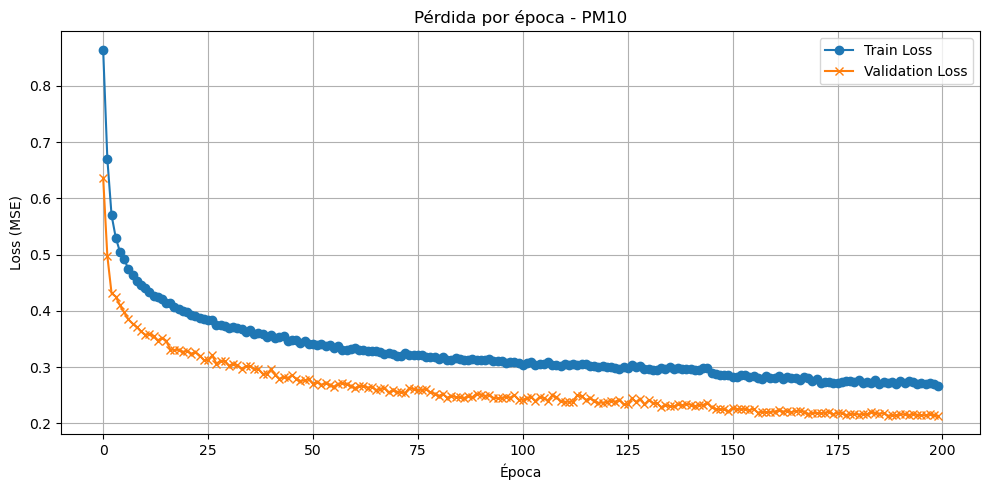


ENTRENANDO RED NEURONAL PARA PM2,5
Datos NN - Train: 51449, Val: 7350, Test: 14700
Época 1/200, Train Loss: 0.7938, Val Loss: 0.4545
Época 21/200, Train Loss: 0.3194, Val Loss: 0.2462
Época 41/200, Train Loss: 0.2744, Val Loss: 0.1949
Época 61/200, Train Loss: 0.2556, Val Loss: 0.1779
Época 81/200, Train Loss: 0.2359, Val Loss: 0.1575
Época 101/200, Train Loss: 0.2293, Val Loss: 0.1489
Época 121/200, Train Loss: 0.2172, Val Loss: 0.1481
Época 141/200, Train Loss: 0.2135, Val Loss: 0.1408
Época 161/200, Train Loss: 0.2083, Val Loss: 0.1300
Época 181/200, Train Loss: 0.2026, Val Loss: 0.1260

RESULTADOS FINALES NN:
MSE: 26.369
MAE: 3.621
R²: 0.870


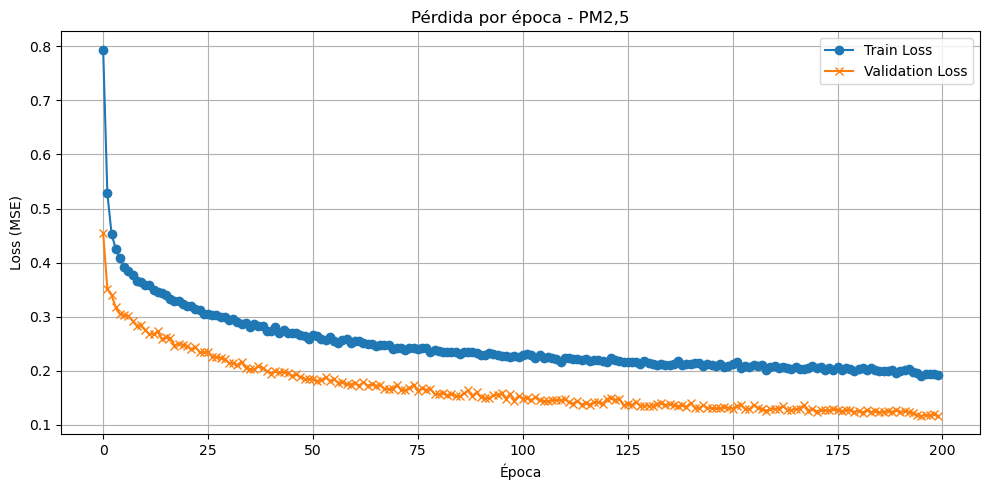


ENTRENANDO RED NEURONAL PARA NO2
Datos NN - Train: 15073, Val: 2154, Test: 4307
Época 1/200, Train Loss: 1.0359, Val Loss: 0.7324
Época 21/200, Train Loss: 0.5743, Val Loss: 0.5205
Época 41/200, Train Loss: 0.5028, Val Loss: 0.4510
Época 61/200, Train Loss: 0.4616, Val Loss: 0.4224
Época 81/200, Train Loss: 0.4353, Val Loss: 0.4104
Época 101/200, Train Loss: 0.4162, Val Loss: 0.3832
Época 121/200, Train Loss: 0.3901, Val Loss: 0.3732
Época 141/200, Train Loss: 0.3755, Val Loss: 0.3631
Época 161/200, Train Loss: 0.3681, Val Loss: 0.3578
Época 181/200, Train Loss: 0.3554, Val Loss: 0.3572
Early stopping en época 182

RESULTADOS FINALES NN:
MSE: 43.551
MAE: 4.684
R²: 0.661


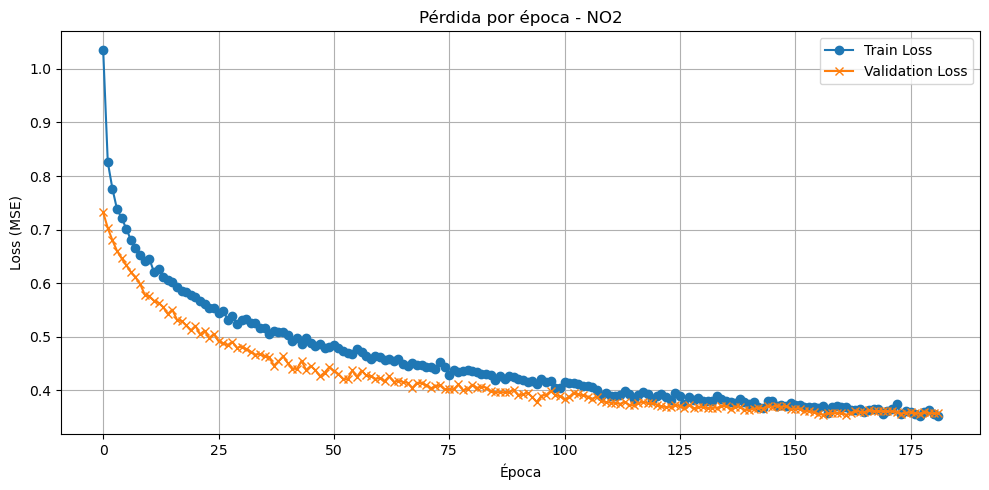


ENTRENANDO RED NEURONAL PARA O3
Datos NN - Train: 16078, Val: 2297, Test: 4594
Época 1/200, Train Loss: 0.6190, Val Loss: 0.3484
Época 21/200, Train Loss: 0.2669, Val Loss: 0.2054
Época 41/200, Train Loss: 0.2321, Val Loss: 0.1843
Época 61/200, Train Loss: 0.2128, Val Loss: 0.1694
Época 81/200, Train Loss: 0.2035, Val Loss: 0.1591
Época 101/200, Train Loss: 0.1965, Val Loss: 0.1574
Época 121/200, Train Loss: 0.1788, Val Loss: 0.1502
Época 141/200, Train Loss: 0.1691, Val Loss: 0.1424
Época 161/200, Train Loss: 0.1718, Val Loss: 0.1431
Época 181/200, Train Loss: 0.1580, Val Loss: 0.1383

RESULTADOS FINALES NN:
MSE: 94.307
MAE: 6.517
R²: 0.861


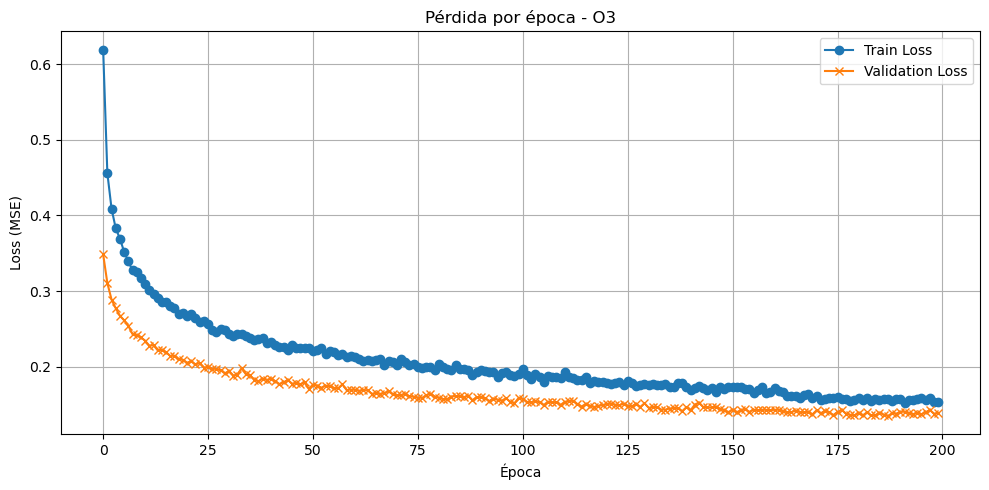


TABLA DE MÉTRICAS - REDES NEURONALES
Contaminante         Modelo     MSE   MAE    R²  Datos
        PM10 Neural Network 105.405 7.171 0.769  67159
       PM2,5 Neural Network  26.369 3.621 0.870  73499
         NO2 Neural Network  43.551 4.684 0.661  21534
          O3 Neural Network  94.307 6.517 0.861  22969

Resultados NN guardados en 'resultados_neural_networks.csv'

COMPARACIÓN RANDOM FOREST vs NEURAL NETWORKS
Contaminante         Modelo     MSE   MAE    R²  Datos
        PM10  Random Forest  81.047 5.919 0.823  67159
        PM10        XGBoost  92.427 6.535 0.798  67159
       PM2,5  Random Forest  17.280 2.593 0.915  73499
       PM2,5        XGBoost  23.900 3.260 0.882  73499
         NO2  Random Forest  44.817 4.539 0.651  21534
         NO2        XGBoost  44.941 4.651 0.650  21534
          O3  Random Forest  97.379 6.478 0.857  22969
          O3        XGBoost  87.145 6.394 0.872  22969
        PM10 Neural Network 105.405 7.171 0.769  67159
       PM2,5 Neural Network  2

In [16]:
# =============================================
# EJECUCIÓN PRINCIPAL
# =============================================

# 1. Entrenar Redes Neuronales (usa copia independiente)
print("\n" + "="*60)
print("INICIANDO ENTRENAMIENTO DE REDES NEURONALES")
print("="*60)

resultados_neural_networks = entrenar_redes_neuronales(df_processed)

# 3. Comparar resultados si tienes ambos
if 'df_resultados' in locals() and resultados_neural_networks is not None:
    print("\n" + "="*80)
    print("COMPARACIÓN RANDOM FOREST vs NEURAL NETWORKS")
    print("="*80)

    # Combinar resultados para comparación
    todos_resultados = pd.concat([df_resultados, resultados_neural_networks], ignore_index=True)
    print(todos_resultados.to_string(index=False, float_format='%.3f'))


## Optimizador de Hiperparametros mediante Algoritmo Geneticos

In [18]:
!pip install deap

In [27]:
import numpy as np
import random
from deap import base, creator, tools, algorithms
import warnings
warnings.filterwarnings('ignore')

# =============================================
# BÚSQUEDA DE HIPERPARÁMETROS CON DEAP
# =============================================

# Variables globales para DEAP
current_contaminant = None
current_df = None
current_features = None

def evaluate_individual(individual):
    """
    Función de evaluación para DEAP.
    Evalúa un individuo (conjunto de hiperparámetros) y retorna su fitness.
    """
    global current_contaminant, current_df, current_features

    try:
        # Decodificar hiperparámetros del individuo
        hidden_layer_1 = int(individual[0])
        hidden_layer_2 = int(individual[1])
        hidden_layer_3 = int(individual[2])
        dropout_rate = individual[3]
        learning_rate = individual[4]
        batch_size = int(individual[5])

        print(f"Evaluando: Capas=[{hidden_layer_1},{hidden_layer_2},{hidden_layer_3}], "
              f"Dropout={dropout_rate:.3f}, LR={learning_rate:.4f}, Batch={batch_size}")

        # Preparar datos con batch_size específico
        train_loader, val_loader, test_loader, scaler_X, scaler_y = preparar_datos_nn(
            current_df, current_contaminant, current_features, batch_size=batch_size
        )

        # Crear modelo con hiperparámetros del individuo
        input_size = len(current_features)
        hidden_sizes = [hidden_layer_1, hidden_layer_2, hidden_layer_3]
        model = ContaminanteNN(input_size, hidden_sizes, dropout_rate)

        # Entrenar modelo con menos épocas para evaluación más rápida
        model_trained, train_losses, val_losses = entrenar_modelo_nn(
            model, train_loader, val_loader,
            num_epochs=45,  # Reducido para velocidad
            learning_rate=learning_rate
        )

        # Evaluar en conjunto de validación
        mse, mae, r2, predictions, actuals = evaluar_modelo_nn(
            model_trained, val_loader, scaler_y
        )

        # Fitness basado en R² (mayor es mejor)
        fitness_score = r2 if r2 > 0 else 0.001

        print(f"Resultado: R²={r2:.3f}, MSE={mse:.3f}")

        return (fitness_score,)  # DEAP requiere tupla

    except Exception as e:
        print(f"Error en evaluación: {str(e)}")
        return (0.001,)  # Fitness muy bajo para individuos problemáticos

def mutate_individual(individual):
    """
    Función de mutación personalizada para hiperparámetros de NN.
    """
    # Seleccionar gen aleatorio para mutar
    gene = random.randint(0, len(individual) - 1)

    if gene == 0:  # hidden_layer_1
        individual[0] = random.randint(128, 512)
    elif gene == 1:  # hidden_layer_2
        individual[1] = random.randint(64, 256)
    elif gene == 2:  # hidden_layer_3
        individual[2] = random.randint(32, 128)
    elif gene == 3:  # dropout_rate
        individual[3] = random.uniform(0.1, 0.5)
    elif gene == 4:  # learning_rate
        individual[4] = random.uniform(0.001, 0.1)
    elif gene == 5:  # batch_size
        individual[5] = random.choice([64, 128, 256, 512])

    return (individual,)

def optimizar_hiperparametros_deap(df_processed, contaminante, features,
                                   population_size=40, generations=15):
    """
    Función principal para optimizar hiperparámetros usando DEAP.
    """
    global current_contaminant, current_df, current_features

    # Configurar variables globales
    current_contaminant = contaminante
    current_df = df_processed.copy()
    current_features = features

    print(f"\n{'='*70}")
    print(f"OPTIMIZANDO HIPERPARÁMETROS PARA {contaminante} CON DEAP")
    print(f"{'='*70}")

    # Configurar DEAP
    if hasattr(creator, "FitnessMax"):
        del creator.FitnessMax
    if hasattr(creator, "Individual"):
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar R²
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    # Definir rangos de hiperparámetros
    toolbox.register("attr_hidden1", random.randint, 128, 512)      # Capa 1
    toolbox.register("attr_hidden2", random.randint, 64, 256)      # Capa 2
    toolbox.register("attr_hidden3", random.randint, 32, 128)       # Capa 3
    toolbox.register("attr_dropout", random.uniform, 0.1, 0.5)    # Dropout
    toolbox.register("attr_lr", random.uniform, 0.001, 0.1)      # Learning rate
    toolbox.register("attr_batch", random.choice, [64, 128, 256, 512])  # Batch size

    # Crear individuo con 6 genes
    toolbox.register("individual", tools.initCycle, creator.Individual,
                     (toolbox.attr_hidden1, toolbox.attr_hidden2, toolbox.attr_hidden3,
                      toolbox.attr_dropout, toolbox.attr_lr, toolbox.attr_batch), n=1)

    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Operadores genéticos
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", mutate_individual)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate_individual)

    # Crear población inicial
    pop = toolbox.population(n=population_size)

    # Configurar estadísticas
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Hall of Fame para guardar mejores individuos
    hof = tools.HallOfFame(5)

    # Ejecutar algoritmo genético
    print(f"Iniciando evolución con {population_size} individuos por {generations} generaciones...")

    pop, log = algorithms.eaSimple(
        pop, toolbox,
        cxpb=0.7,                    # Probabilidad de crossover
        mutpb=0.2,                   # Probabilidad de mutación
        ngen=generations,            # Número de generaciones
        stats=stats,
        halloffame=hof,
        verbose=True
    )

    # Obtener mejor individuo
    best_individual = hof[0]
    best_params = {
        'hidden_sizes': [int(best_individual[0]), int(best_individual[1]), int(best_individual[2])],
        'dropout_rate': best_individual[3],
        'learning_rate': best_individual[4],
        'batch_size': int(best_individual[5])
    }

    print(f"\n{'='*50}")
    print("MEJORES HIPERPARÁMETROS ENCONTRADOS:")
    print(f"{'='*50}")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    print(f"Fitness (R²): {best_individual.fitness.values[0]:.4f}")

    return best_params, hof, log

def entrenar_con_mejores_parametros(df_processed, contaminante, features, best_params):
    """
    Entrena el modelo final con los mejores hiperparámetros encontrados.
    """
    print(f"\n{'='*60}")
    print(f"ENTRENAMIENTO FINAL CON MEJORES PARÁMETROS - {contaminante}")
    print(f"{'='*60}")

    # Preparar datos con mejores parámetros
    train_loader, val_loader, test_loader, scaler_X, scaler_y = preparar_datos_nn(
        df_processed, contaminante, features,
        batch_size=best_params['batch_size']
    )

    # Crear modelo con mejores hiperparámetros
    input_size = len(features)
    model = ContaminanteNN(
        input_size,
        best_params['hidden_sizes'],
        best_params['dropout_rate']
    )

    # Entrenar modelo completo
    model_final, train_losses, val_losses = entrenar_modelo_nn(
        model, train_loader, val_loader,
        num_epochs=200,  # Entrenamiento completo
        learning_rate=best_params['learning_rate']
    )

    # Evaluar modelo final
    mse, mae, r2, predictions, actuals = evaluar_modelo_nn(
        model_final, test_loader, scaler_y
    )

    print(f"\nRESULTADOS FINALES OPTIMIZADOS:")
    print(f"MSE: {mse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R²: {r2:.3f}")

    # Guardar modelo optimizado
    torch.save({
        'model_state_dict': model_final.state_dict(),
        'scaler_X': scaler_X,
        'scaler_y': scaler_y,
        'features': features,
        'contaminante': contaminante,
        'best_params': best_params
    }, f'modelo_optimizado_{contaminante.replace(",", "").replace(".", "")}.pth')

    return {
        'Contaminante': contaminante,
        'Modelo': 'Neural Network (Optimizado)',
        'MSE': mse,
        'MAE': mae,
        'R²': r2,
        'Best_Params': best_params
    }

# =============================================
# EJECUCIÓN PRINCIPAL CON OPTIMIZACIÓN
# =============================================

def ejecutar_optimizacion_completa(df_processed):
    """
    Ejecuta la optimización completa para todos los contaminantes.
    """
    # Preparar datos básicos
    df_opt = df_processed.copy()

    # Codificar estaciones
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df_opt['ESTACION_ENC'] = le.fit_transform(df_opt['ESTACION'])

    # Crear características temporales
    df_opt['HORA'] = df_opt['TIEMPO'].dt.hour
    df_opt['DIA'] = df_opt['TIEMPO'].dt.day
    df_opt['MES'] = df_opt['TIEMPO'].dt.month
    df_opt['DIA_SEMANA'] = df_opt['TIEMPO'].dt.dayofweek
    df_opt['DIA_AÑO'] = df_opt['TIEMPO'].dt.dayofyear

    # Features
    features = ['ESTACION_ENC', 'HORA', 'DIA', 'MES', 'DIA_SEMANA', 'DIA_AÑO',
                'TEMPERATURA', 'LLUVIA', 'HUMEDAD', 'DIR. VIENTO', 'VEL.VIENTO', 'RAD. SOLAR']

    contaminantes = ['PM10', 'PM2,5', 'NO2', 'O3']

    resultados_optimizados = []
    mejores_parametros = {}

    for contaminante in contaminantes:
        try:
            # Optimizar hiperparámetros
            best_params, hof, log = optimizar_hiperparametros_deap(
                df_opt, contaminante, features,
                population_size=20,
                generations=6   
            )

            # Entrenar modelo final con mejores parámetros
            resultado = entrenar_con_mejores_parametros(
                df_opt, contaminante, features, best_params
            )

            resultados_optimizados.append(resultado)
            mejores_parametros[contaminante] = best_params

        except Exception as e:
            print(f"Error optimizando {contaminante}: {str(e)}")
            continue

    # Mostrar resultados finales
    if resultados_optimizados:
        df_resultados = pd.DataFrame(resultados_optimizados)
        print(f"\n{'='*80}")
        print("RESULTADOS FINALES - MODELOS OPTIMIZADOS CON DEAP")
        print(f"{'='*80}")
        print(df_resultados[['Contaminante', 'Modelo', 'MSE', 'MAE', 'R²']].to_string(index=False, float_format='%.3f'))

        # Guardar resultados
        df_resultados.to_csv('resultados_optimizados_deap.csv', index=False)

    return resultados_optimizados, mejores_parametros


In [29]:
# =============================================
# EJECUTAR OPTIMIZACIÓN CON DEAP
# =============================================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

print("\n" + "="*60)
print("INICIANDO OPTIMIZACIÓN DE HIPERPARÁMETROS CON DEAP")
print("="*60)

# Ejecutar optimización completa
resultados_opt, mejores_params = ejecutar_optimizacion_completa(df_processed)

# Comparar con resultados anteriores si los tienes
if 'resultados_neural_networks' in locals() and resultados_opt:
    print("\n" + "="*80)
    print("COMPARACIÓN: MODELOS NORMALES vs OPTIMIZADOS")
    print("="*80)

    # Mostrar mejores parámetros encontrados
    print("\nMEJORES HIPERPARÁMETROS POR CONTAMINANTE:")
    for contaminante, params in mejores_params.items():
        print(f"\n{contaminante}:")
        for param, value in params.items():
            print(f"  {param}: {value}")


cuda

INICIANDO OPTIMIZACIÓN DE HIPERPARÁMETROS CON DEAP

OPTIMIZANDO HIPERPARÁMETROS PARA PM10 CON DEAP
Iniciando evolución con 20 individuos por 6 generaciones...
Evaluando: Capas=[275,113,100], Dropout=0.265, LR=0.0249, Batch=256
Época 1/45, Train Loss: 0.7191, Val Loss: 0.4839
Época 21/45, Train Loss: 0.4000, Val Loss: 0.3544
Época 41/45, Train Loss: 0.3524, Val Loss: 0.2997
Resultado: R²=0.708, MSE=129.439
Evaluando: Capas=[350,93,96], Dropout=0.168, LR=0.0384, Batch=512
Época 1/45, Train Loss: 0.8223, Val Loss: 0.5176
Época 21/45, Train Loss: 0.3567, Val Loss: 0.3261
Época 41/45, Train Loss: 0.3570, Val Loss: 0.3292
Resultado: R²=0.694, MSE=135.528
Evaluando: Capas=[335,70,84], Dropout=0.126, LR=0.0100, Batch=256
Época 1/45, Train Loss: 0.6146, Val Loss: 0.4554
Época 21/45, Train Loss: 0.3133, Val Loss: 0.2786
Época 41/45, Train Loss: 0.2881, Val Loss: 0.2490
Resultado: R²=0.744, MSE=113.439
Evaluando: Capas=[131,211,33], Dropout=0.190, LR=0.0958, Batch=512
Época 1/45, Train Loss